# Лабораторна робота №10 ІАД
# Transfer Learning з використанням TensorFlow

<b>Виконала:</b> студентка МІТ-31, Панченко Владислава

<b>Завдання:</b>
1. Вибір моделі: Оберіть одну з доступних у TensorFlow натренованих моделей, таких як MobileNetV2 або ResNet50. Ці моделі мають бути завантажені з TensorFlow Hub.
2. Збір даних: Використайте датасет, що містить зображення для класифікації, наприклад, зображення котів і собак (датасет CIFAR-10 або інший подібний).
3. Передобробка даних: Завантажте та підготуйте дані, нормалізуючи зображення та масштабуючи їх під вимоги обраної моделі.
4. Адаптація моделі:
Завантажте обрану модель із TensorFlow Hub і заморозьте всі шари, окрім верхніх кількох.
Додайте новий повнозв’язаний шар (fully connected layer) з кількістю виходів, що дорівнює кількості класів у вашому наборі даних.
5. Fine-tuning:
Розморозьте деякі шари в моделі для подальшого донавчання (fine-tuning).
Проведіть донавчання (тренування) моделі на новому датасеті.
6. Оцінка моделі: Оцініть точність моделі та побудуйте матрицю похибок для демонстрації її ефективності.
7. Візуалізація результатів: Покажіть зображення з тестового набору даних із передбаченими класами, щоб продемонструвати роботу моделі.


Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.1467 - loss: 2.8279 - val_accuracy: 0.1760 - val_loss: 2.4587
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.5024 - loss: 1.5509 - val_accuracy: 0.2940 - val_loss: 2.2055
Epoch 3/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.7407 - loss: 0.9229 - val_accuracy: 0.3040 - val_loss: 2.0559
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8889 - loss: 0.5215 - val_accuracy: 0.3240 - val_loss: 1.9973
16/16 - 6s - 405ms/step - accuracy: 0.3240 - loss: 1.9973
Test accuracy on a smaller dataset: 0.3240000009536743
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step


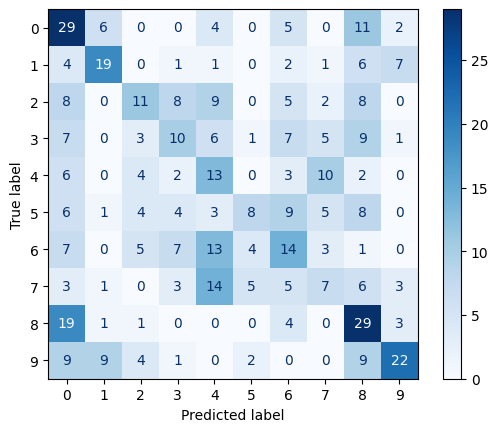

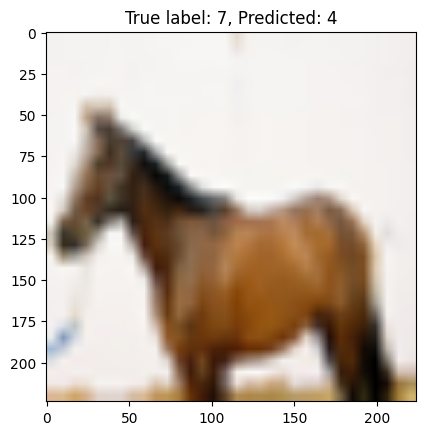

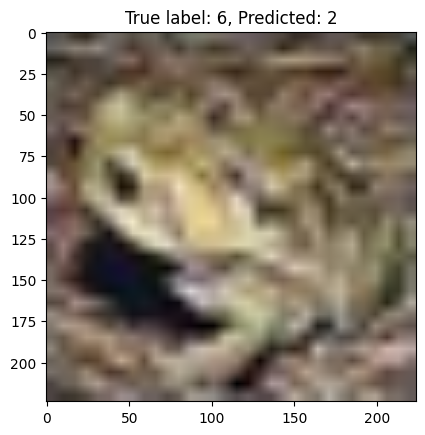

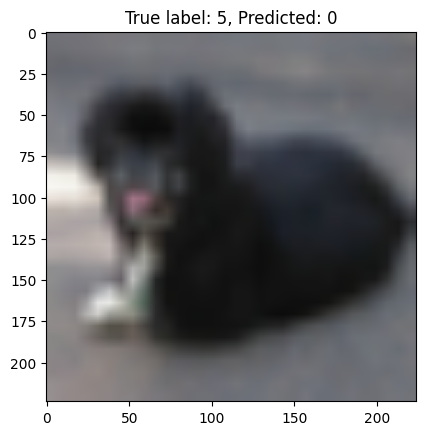

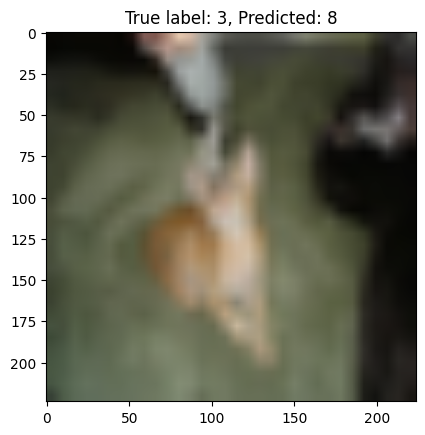

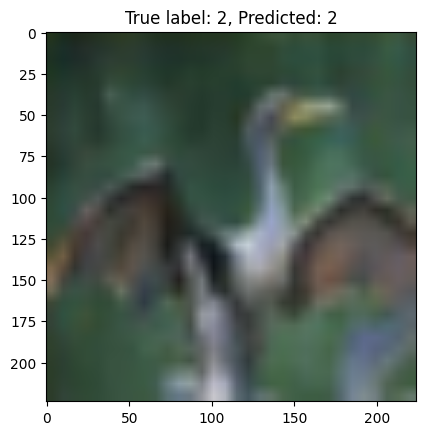

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 671ms/step - accuracy: 0.2572 - loss: 22.6923 - val_accuracy: 0.5020 - val_loss: 1.9413
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 668ms/step - accuracy: 0.6811 - loss: 0.9830 - val_accuracy: 0.5340 - val_loss: 1.4750
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 671ms/step - accuracy: 0.8446 - loss: 0.4682 - val_accuracy: 0.5740 - val_loss: 1.3782
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 632ms/step - accuracy: 0.8898 - loss: 0.2614 - val_accuracy: 0.6300 - val_loss: 1.3638
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 635ms/step - accuracy: 0.9751 - loss: 0.1155 - val_accuracy: 0.6560 - val_loss: 1.2191


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

base_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
base_model.trainable = False 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_small = x_train[:1000]
y_train_small = y_train[:1000]
x_test_small = x_test[:500]
y_test_small = y_test[:500]

x_train_small = x_train_small / 255.0
x_test_small = x_test_small / 255.0

x_train_resized = tf.image.resize(x_train_small, (224, 224))
x_test_resized = tf.image.resize(x_test_small, (224, 224))

model = Sequential([
    base_model,
    Flatten(), 
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_resized, y_train_small, epochs=4, validation_data=(x_test_resized, y_test_small))

test_loss, test_acc = model.evaluate(x_test_resized, y_test_small, verbose=2)
print(f"Test accuracy on a smaller dataset: {test_acc}")

y_pred = np.argmax(model.predict(x_test_resized), axis=1)

cm = confusion_matrix(y_test_small, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

for i in range(5):
    idx = random.randint(0, len(x_test_resized) - 1)
    img = x_test_resized[idx]
    true_label = y_test_small[idx][0]
    pred_label = y_pred[idx]
    
    plt.imshow(img)
    plt.title(f"True label: {true_label}, Predicted: {pred_label}")
    plt.show()

base_model.trainable = False
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_baseline = model.fit(x_train_resized, y_train_small, epochs=5, validation_data=(x_test_resized, y_test_small))



<b>Додаткове завдання:</b>
Дослідіть, як зміна гіперпараметрів (наприклад, швидкість навчання) впливає на результати донавчання моделі, та проаналізуйте, як це відображається на ефективності класифікації.<br><br>
Дослідимо вплив швидкості навчання на результат, використовуючи кілька варіантів цієї величини. Розглянемо три типових значення:
- Висока швидкість навчання — 0.01
- Оптимальна швидкість навчання — 0.001
- Мала швидкість навчання — 0.00001

Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 712ms/step - accuracy: 0.1726 - loss: 2.0855 - val_accuracy: 0.1320 - val_loss: 2.2380
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 647ms/step - accuracy: 0.1930 - loss: 2.1164 - val_accuracy: 0.1500 - val_loss: 2.1905
Epoch 3/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 644ms/step - accuracy: 0.2070 - loss: 2.1017 - val_accuracy: 0.1740 - val_loss: 2.8515
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - accuracy: 0.1655 - loss: 2.1351 - val_accuracy: 0.1200 - val_loss: 2.2765
Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 669ms/step - accuracy: 0.1823 - loss: 2.1306 - val_accuracy: 0.1320 - val_loss: 2.2401
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 637ms/step - accuracy: 0.1662 - loss: 2.1047 - val_accuracy: 0.1440 - val_loss: 2.2030
Epoch 3/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 641ms/step - accuracy: 0.2153 - loss: 2.0484 - val_accuracy: 0.1440 - val_loss: 2.2056
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 645ms/step - accuracy: 0.2211 - loss: 2.0420 - val_accuracy: 0.

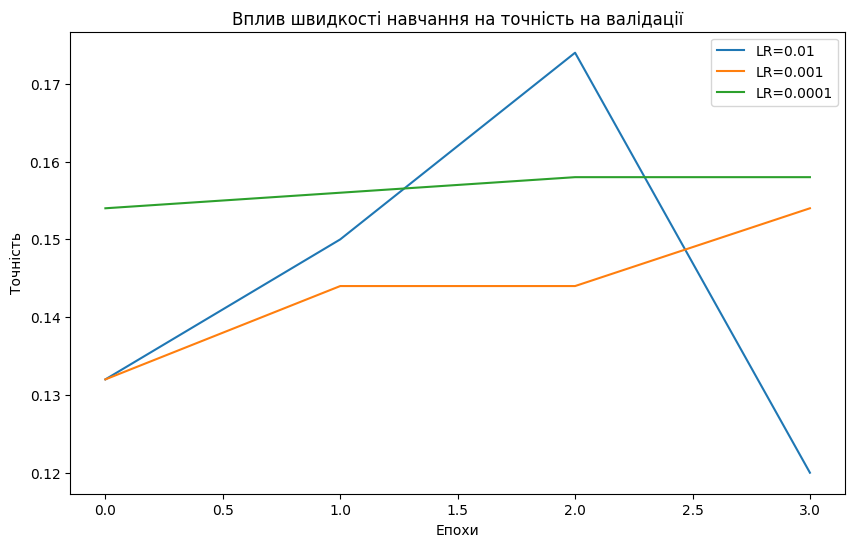

In [7]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

y_train = y_train[:len(x_train_resized)]
y_test = y_test[:len(x_test_resized)]

learning_rates = [0.01, 0.001, 0.0001]
histories = []

for lr in learning_rates:
    model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_resized, y_train, epochs=4, validation_data=(x_test_resized, y_test))
    histories.append(history)

plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'LR={learning_rates[i]}')
plt.title('Вплив швидкості навчання на точність на валідації')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

Аналіз результатів:
- Висока швидкість навчання (0.01): на початкових етапах навчання модель може показати швидке зростання точності, але потім швидко почне коливатися або навіть погіршуватися, оскільки модель не здатна стабільно сходитися до мінімуму функції втрат.
- Оптимальна швидкість навчання (0.001): модель здебільшого показує стабільний приріст точності та досягає найкращих результатів на валідаційному наборі даних.
- Низька швидкість навчання (0.0001): модель може досягти хороших результатів, але навчання буде дуже повільним. Можливо, це дозволить моделі точніше адаптуватися, але також збільшить час тренування.

<b>Звіт:</b>
Окрім того у ноутбуці має бути опис структури обраної моделі та етапи її адаптації.Результати оцінки моделі та порівняння з базовою моделлю без fine-tuning.Ваші висновки щодо ефективності transfer learning у задачі класифікації зображень.

Опис MobileNetV2:
- Використовує попередньо натреновану модель, що була натренована на великому наборі даних ImageNet.
- Модель має архітектуру з глибокими згортками, що дозволяють знаходити багаті ознаки в зображеннях.
- Вхідний розмір зображень: 224x224x3 (кольорові зображення).
- Всі шари в базовій моделі за замовчуванням заморожені (trainable=False).

Етапи адаптації моделі:
- Завантаження попередньо натренованої моделі;
- Додавання нових шарів. Після базової моделі додається: Flatten() для перетворення виходів в одномірний вектор. Dense(128, activation='relu') — новий повнозв'язаний шар для подальшого навчання. Dense(10, activation='softmax') — останній шар для класифікації на 10 класів (CIFAR-10);
- Замороження базових шарів. На перших етапах навчання ми заморожуємо всі шари попередньо натренованої моделі (trainable=False), щоб тільки нові додані шари могли бути навчені.
- Fine-tuning (розморожування деяких шарів). Після початкового навчання, ми розморожуємо деякі шари базової моделі (trainable=True) для донавчання. Це дозволяє моделі адаптуватися до нового набору даних, зберігаючи при цьому переваги з попереднього навчання на великому наборі даних (ImageNet).

Результати оцінки моделі та порівняння:
Модель з fine-tuning після розмороження декількох шарів базової моделі та донавчання на новому наборі даних, продемонструвала покращену точність. Це свідчить про ефективність fine-tuning, коли модель підлаштовується до специфічних ознак даного набору зображень.<br>

Висновки:
Transfer Learning є потужним підходом для задач класифікації зображень, оскільки дозволяє використати багаті ознаки, отримані при навчанні на великих датасетах, і адаптувати їх до нової задачі з меншими витратами часу та ресурсів. Fine-tuning значно покращує результати, оскільки дозволяє моделі адаптуватися до нових специфічних особливостей набору даних. Це особливо корисно в ситуаціях, коли є обмежені дані для тренування, але потрібно отримати хорошу точність.